### Importing important libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Reading the dataset

In [3]:
titanic = pd.read_csv("./Dataset/Titanic.csv")
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


### Data Analysis

In [4]:
titanic.shape

(1309, 12)

There are 1309 rows & 12 columns. This means there are 1309 datapoints in the dataset & 12 features.

In [5]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Out of these features, the feature 'survived' is the target feature.

In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


There are 5 object fields which needs to be encoded.

'age', 'cabin' & embarked has some missing values


In [7]:
titanic.isna().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

### Data Visualization

<AxesSubplot:>

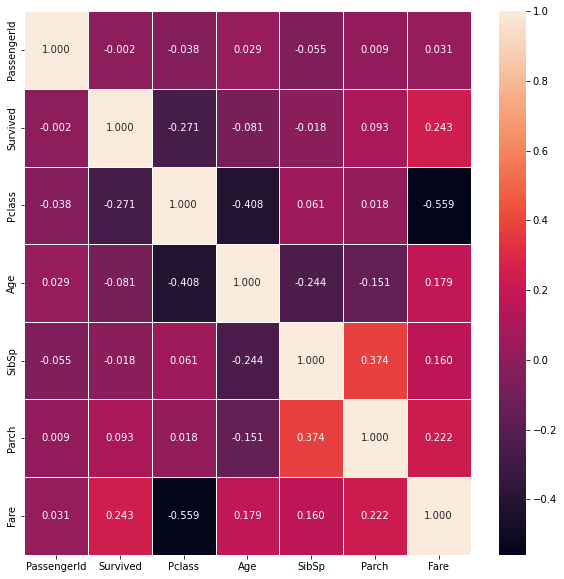

In [8]:
plt.figure(figsize = (10,10))
#print(titanic.corr())
sns.heatmap(titanic.corr(),annot = True, linewidths= 1, fmt = '.3f' )

By the previous knowledge we have, let's create a new feature telling whether the passenger is <strong>man, woman or a child.</strong>

In [9]:
def enhnc_ppl(psngr):
    age, sex = psngr
    if age < 16:
        return "child"
    else:
        return dict(male= "man", female = "woman")[sex]

In [10]:
titanic["Who"] = titanic[["Age","Sex"]].apply(enhnc_ppl,axis=1)
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Who
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,man
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,woman
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,woman
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,woman
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,man
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,man
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,man
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,woman
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


We will create another feature to see wether a person was an adult male or not.

In [11]:
titanic["Adult_male"] = titanic.Who == "man"
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Who,Adult_male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,man,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,woman,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,woman,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,woman,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,man,True


We can have another feature with the deck information.

In [12]:
titanic["Deck"] = titanic.Cabin.str[0]
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Who,Adult_male,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,man,True,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,woman,False,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,woman,False,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,woman,False,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,man,True,NaN


Now one more feature can be created, whether the passenger was alone or not.

In [13]:
titanic["Alone"] = ~(titanic.Parch + titanic.SibSp).astype(bool)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Who,Adult_male,Deck,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,man,True,NaN,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,woman,False,C,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,woman,False,NaN,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,woman,False,C,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,man,True,NaN,True


try to look at the trends in different feature.

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


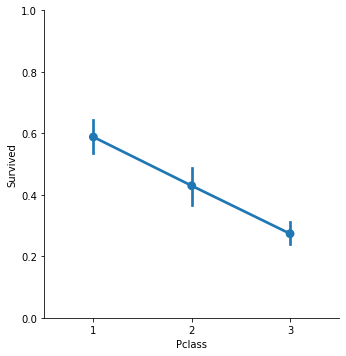

In [14]:
sns.factorplot(x="Pclass",y="Survived",data = titanic).set (ylim= (0,1))

From here we see that if a passenger travelled in 1st class, the survival rate is highest and equal to 0.63. If a passenger travelled in 2nd class, the survival rate is medium and equal to 0.5. If a passenger travelled in 3rd class, the survival rate is lowest and equal to 0.3

Let's see how the above case is dependent on the <strong>sex of the passenger.</strong>

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


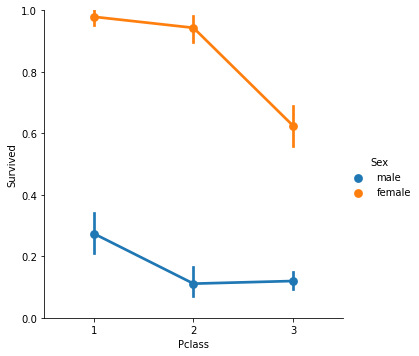

In [15]:
sns.factorplot(x="Pclass",y="Survived",data = titanic,hue = "Sex").set (ylim= (0,1))

It;s pretty clear that the surviavl of female passengers is much more than the male passengers. From here we see that if a passenger travelled in 1st class and was female then their survival chance is most. On the other hand, if a passenger travelled in 3rd class amd was male then their survival chance is least. So we can combine these two features to <strong>create new feature.</strong>

Let's have a similar observation with the features <strong>'class' & 'who'</strong>

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


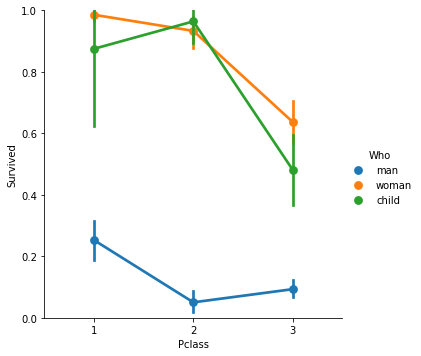

In [16]:
sns.factorplot(x="Pclass",y="Survived",data = titanic,hue = "Who").set (ylim= (0,1))

From here also we can have similar observation. We get 9 cases from here and we will be building a feature based on it in a while.

Let's try to find the trends with the feature <strong>'alone' & 'adult_male'.</strong>

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


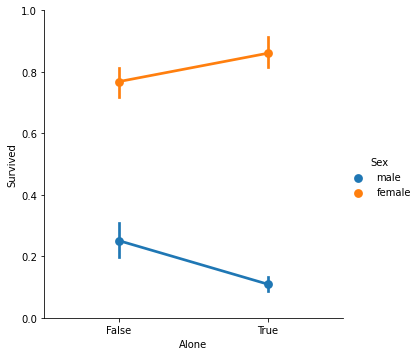

In [17]:
sns.factorplot(x="Alone",y="Survived",hue="Sex",data=titanic).set (ylim= (0,1))

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


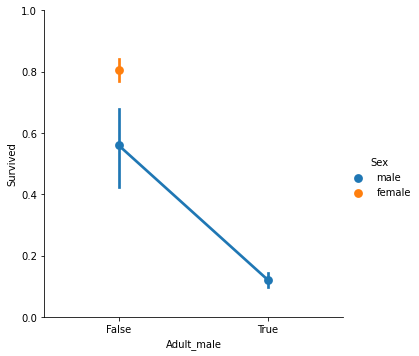

In [18]:
sns.factorplot(x="Adult_male",y="Survived",hue="Sex",data=titanic).set (ylim= (0,1))

<AxesSubplot:xlabel='Deck', ylabel='Survived'>

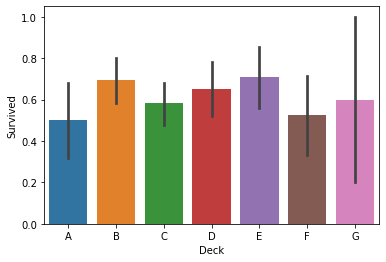

In [19]:
sns.barplot(x="Deck",y="Survived",data=titanic,order=['A','B','C','D','E','F','G'])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


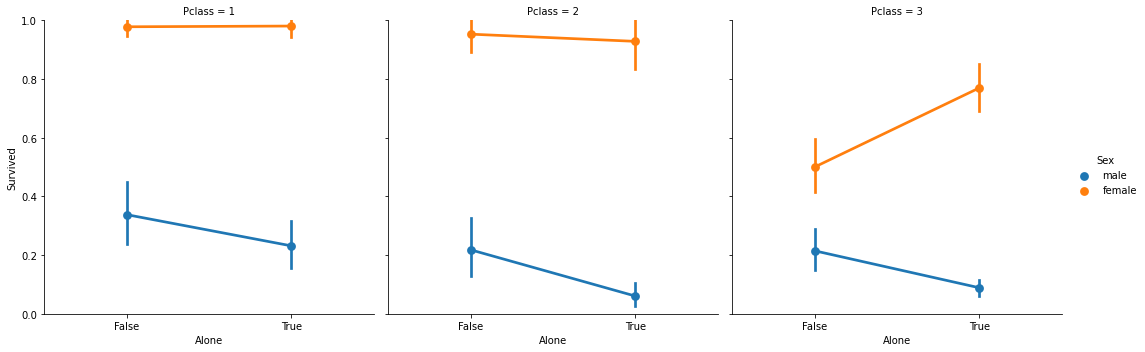

In [20]:
sns.factorplot(x="Alone",y="Survived",hue="Sex",data=titanic,col = "Pclass").set (ylim= (0,1))

### Data Preprocessing

Let's have the object fields encoded.

In [21]:
#encoding deck
dk = {'C':1, 'E':2, 'G':3, 'D':4, 'A':5, 'B':6, 'F':7, 'T':8}
titanic["Deck"] = titanic.Deck.map(dk)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Who,Adult_male,Deck,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,man,True,NaN,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,woman,False,1.0,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,woman,False,NaN,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,woman,False,1.0,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,man,True,NaN,True


In [22]:
titanic["Embarked"].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [23]:
# encoding embarked
e = {"S":1,"Q":2,"C":3}
titanic["Embarked"] = titanic.Embarked.map(e)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Who,Adult_male,Deck,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,1.0,man,True,NaN,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,3.0,woman,False,1.0,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1.0,woman,False,NaN,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,1.0,woman,False,1.0,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,1.0,man,True,NaN,True


In [24]:
# encoding gender
gn = {"male":0, "female":1}
titanic["Sex"] = titanic.Sex.map(gn)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Who,Adult_male,Deck,Alone
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,1.0,man,True,NaN,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,3.0,woman,False,1.0,False
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1.0,woman,False,NaN,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,1.0,woman,False,1.0,False
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,1.0,man,True,NaN,True


In [25]:
#encoding who
wh = {"man":1,"woman":2,'child':3}
titanic["Who"] = titanic["Who"].map(wh)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Who,Adult_male,Deck,Alone
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,1.0,1,True,NaN,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,3.0,2,False,1.0,False
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1.0,2,False,NaN,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,1.0,2,False,1.0,False
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,1.0,1,True,NaN,True


Now we need to impute the <strong>Missing Values</strong>

There are alot of missing values in deck. So we will simply fill it with <strong>0</strong>

In [26]:
#imputing deck
titanic["Deck"] = titanic["Deck"].fillna(0)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Who,Adult_male,Deck,Alone
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,1.0,1,True,0.0,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,3.0,2,False,1.0,False
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1.0,2,False,0.0,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,1.0,2,False,1.0,False
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,1.0,1,True,0.0,True


There are only 2 missing vaues in 'embarked'. So we will find out which of the values in embarked has maximum occurence and fill the missing values with that value.

In [27]:
titanic["Embarked"].value_counts()

1.0    914
3.0    270
2.0    123
Name: Embarked, dtype: int64

In [28]:
#imputing embarked
titanic["Embarked"] = titanic["Embarked"].fillna(1.0)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Who,Adult_male,Deck,Alone
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,1.0,1,True,0.0,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,3.0,2,False,1.0,False
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1.0,2,False,0.0,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,1.0,2,False,1.0,False
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,1.0,1,True,0.0,True


In [29]:
#imputing age
titanic["Age"] = titanic["Age"].fillna(titanic["Age"].mean())
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Who,Adult_male,Deck,Alone
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,1.0,1,True,0.0,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,3.0,2,False,1.0,False
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1.0,2,False,0.0,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,1.0,2,False,1.0,False
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,1.0,1,True,0.0,True


In [30]:
titanic.isna().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          0
Who               0
Adult_male        0
Deck              0
Alone             0
dtype: int64

### Adding New Features

In [31]:
#new feature
def family(para):
    x,y = para
    sz = x + y + 1
    if(sz == 1):
        return 1
    elif(2<= sz <=4):
        return 2
    else:
        return 3

In [32]:
titanic["Fam_sz"] = titanic[['Parch','SibSp']].apply(family,axis = 1)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Who,Adult_male,Deck,Alone,Fam_sz
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,1.0,1,True,0.0,False,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,3.0,2,False,1.0,False,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1.0,2,False,0.0,True,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,1.0,2,False,1.0,False,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,1.0,1,True,0.0,True,1


In [33]:
title = set()
for i in titanic['Name']:
    title.add(i.split(",")[1].split('.')[0].strip())

In [34]:
title_= {
 'Capt':'Officer',
 'Col':'Officer',
 'Don':'Royality',
 'Dona':'Royality',
 'Dr':'Officer',
 'Jonkheer':'Royality',
 'Lady':'Royality',
 'Major':'Officer',
 'Master':'Master',
 'Miss':'Miss',
 'Mlle':'Miss',
 'Mme':'Mrs',
 'Mr':'Mr',
 'Mrs':'Mrs',
 'Ms':'Mrs',
 'Rev':'Officer',
 'Sir':'Royality',
 'the Countess':'Royality'}

In [35]:
def titles():
    titanic['Title'] = titanic['Name'].map(lambda Name:Name.split(",")[1].split('.')[0].strip())
    
    titanic['Title'] = titanic.Title.map(title_)
    
    return titanic

In [36]:
titanic = titles()
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Who,Adult_male,Deck,Alone,Fam_sz,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,NaN,1.0,1,True,0.0,False,2,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,C85,3.0,2,False,1.0,False,2,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,1.0,2,False,0.0,True,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,C123,1.0,2,False,1.0,False,2,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,NaN,1.0,1,True,0.0,True,1,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",0,29.881138,0,0,A.5. 3236,8.0500,NaN,1.0,1,True,0.0,True,1,Mr
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",1,39.000000,0,0,PC 17758,108.9000,C105,3.0,2,False,1.0,True,1,Royality
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",0,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,1.0,1,True,0.0,True,1,Mr
1307,1308,0,3,"Ware, Mr. Frederick",0,29.881138,0,0,359309,8.0500,NaN,1.0,1,True,0.0,True,1,Mr


Now we need to encode these titles. Right now I will use <strong>one-hot encoding</strong> with this.

In [37]:
dummy = pd.get_dummies(titanic["Title"],prefix='Title')
titanic = pd.concat([titanic,dummy],axis=1)

In [38]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Deck,Alone,Fam_sz,Title,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royality
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,...,0.0,False,2,Mr,0,0,1,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,...,1.0,False,2,Mrs,0,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,...,0.0,True,1,Miss,0,1,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,...,1.0,False,2,Mrs,0,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,...,0.0,True,1,Mr,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",0,29.881138,0,0,A.5. 3236,8.0500,...,0.0,True,1,Mr,0,0,1,0,0,0
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",1,39.000000,0,0,PC 17758,108.9000,...,1.0,True,1,Royality,0,0,0,0,0,1
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",0,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,...,0.0,True,1,Mr,0,0,1,0,0,0
1307,1308,0,3,"Ware, Mr. Frederick",0,29.881138,0,0,359309,8.0500,...,0.0,True,1,Mr,0,0,1,0,0,0


In [39]:
def fetur(para):
    p,w = para
    if (p==1):
        if(w==1):
            return 1
        if(w==2):
            return 2
        if(w==3):
            return 3
    if (p==2):
        if(w==1):
            return 4
        if(w==2):
            return 5
        if(w==3):
            return 6
    if (p==3):
        if(w==1):
            return 7
        if(w==2):
            return 8
        if(w==3):
            return 9

In [40]:
titanic['Pcl_who'] = titanic[['Pclass','Who']].apply(fetur,axis=1)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Alone,Fam_sz,Title,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royality,Pcl_who
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,...,False,2,Mr,0,0,1,0,0,0,7
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,...,False,2,Mrs,0,0,0,1,0,0,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,...,True,1,Miss,0,1,0,0,0,0,8
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,...,False,2,Mrs,0,0,0,1,0,0,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,...,True,1,Mr,0,0,1,0,0,0,7


In [41]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Who', 'Adult_male',
       'Deck', 'Alone', 'Fam_sz', 'Title', 'Title_Master', 'Title_Miss',
       'Title_Mr', 'Title_Mrs', 'Title_Officer', 'Title_Royality', 'Pcl_who'],
      dtype='object')

In [42]:
drp_lst = ['PassengerId','Fare','Name','Ticket','Cabin','Title']
titanic = titanic.drop(drp_lst,axis=1)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Who,Adult_male,Deck,Alone,Fam_sz,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royality,Pcl_who
0,0,3,0,22.0,1,0,1.0,1,True,0.0,False,2,0,0,1,0,0,0,7
1,1,1,1,38.0,1,0,3.0,2,False,1.0,False,2,0,0,0,1,0,0,2
2,1,3,1,26.0,0,0,1.0,2,False,0.0,True,1,0,1,0,0,0,0,8
3,1,1,1,35.0,1,0,1.0,2,False,1.0,False,2,0,0,0,1,0,0,2
4,0,3,0,35.0,0,0,1.0,1,True,0.0,True,1,0,0,1,0,0,0,7


<AxesSubplot:>

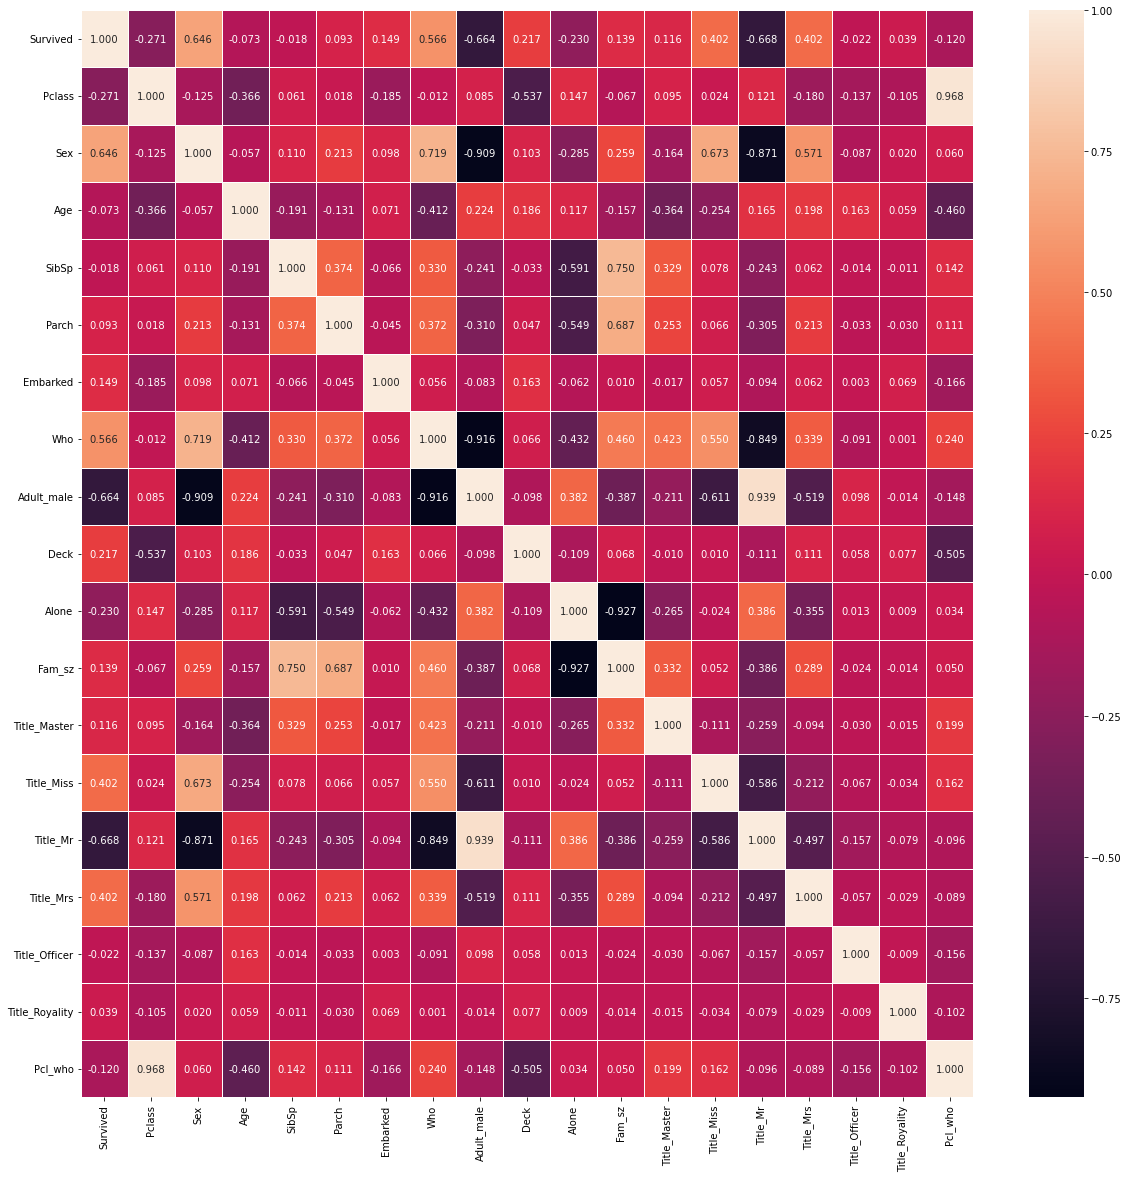

In [43]:
plt.figure(figsize = (20,20))
#print(titanic.corr())
sns.heatmap(titanic.corr(),annot = True, linewidths= 1, fmt = '.3f' )

## Building Model

In [44]:
x_train = titanic.drop("Survived",axis=1)
y_train = titanic["Survived"]

In [45]:
x_train.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked,Who,Adult_male,Deck,Alone,Fam_sz,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royality,Pcl_who
0,3,0,22.0,1,0,1.0,1,True,0.0,False,2,0,0,1,0,0,0,7
1,1,1,38.0,1,0,3.0,2,False,1.0,False,2,0,0,0,1,0,0,2
2,3,1,26.0,0,0,1.0,2,False,0.0,True,1,0,1,0,0,0,0,8
3,1,1,35.0,1,0,1.0,2,False,1.0,False,2,0,0,0,1,0,0,2
4,3,0,35.0,0,0,1.0,1,True,0.0,True,1,0,0,1,0,0,0,7


In [46]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [47]:
print("input=",x_train.shape,"\noutput=",y_train.shape)

input= (1309, 18) 
output= (1309,)


In [48]:
from sklearn.model_selection import train_test_split
# 70% training & 30% testing
x_train, x_test, y_train, y_test = train_test_split(x_train,y_train, test_size = 0.2)

In [49]:
print("input=",x_train.shape,"\noutput=",y_train.shape)
print("\nnew input=",x_test.shape,"\nnew output=",y_test.shape)

input= (1047, 18) 
output= (1047,)

new input= (262, 18) 
new output= (262,)


## Logistic Regression

In [59]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr = lr.fit(x_train,y_train)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [51]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
ac = accuracy_score(y_train, lr.predict(x_train))
print("Training Accuracy: ",ac*100)
'''
con = confusion_matrix(y_train, lr.predict(x_train))
print("Training Confusion_matrix: ",con*100)'''
p = precision_score(y_train, lr.predict(x_train))
print("Training Precision: ",p*100)
r = recall_score(y_train, lr.predict(x_train))
print("Training Recall: ",r*100)
f1 = f1_score(y_train, lr.predict(x_train)) # (2*p*r)/(p+r)
print("Training F1_score: ",ac*100)

Training Accuracy:  87.87010506208213
Training Precision:  85.86956521739131
Training Recall:  80.81841432225065
Training F1_score:  87.87010506208213


In [52]:
ac = accuracy_score(y_test, lr.predict(x_test))
print("Testing Accuracy: ",ac*100)
'''
con = confusion_matrix(y_test, lr.predict(x_test))
print("Testing Confusion_matrix: ",con*100)'''
p = precision_score(y_test, lr.predict(x_test))
print("Testing Precision: ",p*100)
r = recall_score(y_test, lr.predict(x_test))
print("Testing Recall: ",r*100)
f1 = f1_score(y_test, lr.predict(x_test)) # (2*p*r)/(p+r)
print("Testing F1_score: ",ac*100)

Testing Accuracy:  88.16793893129771
Testing Precision:  87.85046728971963
Testing Recall:  83.92857142857143
Testing F1_score:  88.16793893129771


## Random Forset Classifier

In [53]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier( criterion= "gini",
                            min_samples_split= 10,
                            min_samples_leaf= 3,
                            n_jobs= -1,
                            n_estimators = 100,
                            max_features = 0.5,
                            oob_score= True,
                            random_state= 1
)
rf = rf.fit(x_train,y_train)

In [54]:
ac = accuracy_score(y_train, rf.predict(x_train))
print("Training Accuracy: ",ac*100)
'''
con = confusion_matrix(y_train, rf.predict(x_train))
print("Training Confusion_matrix: ",con*100)'''
p = precision_score(y_train, rf.predict(x_train))
print("Training Precision: ",p*100)
r = recall_score(y_train, rf.predict(x_train))
print("Training Recall: ",r*100)
f1 = f1_score(y_train, rf.predict(x_train)) # (2*p*r)/(p+r)
print("Training F1_score: ",ac*100)

Training Accuracy:  90.35339063992359
Training Precision:  90.5027932960894
Training Recall:  82.86445012787725
Training F1_score:  90.35339063992359


In [55]:
ac = accuracy_score(y_test, rf.predict(x_test))
print("Testing Accuracy: ",ac*100)
'''
con = confusion_matrix(y_test, lr.predict(x_test))
print("Testing Confusion_matrix: ",con*100)'''
p = precision_score(y_test, rf.predict(x_test))
print("Testing Precision: ",p*100)
r = recall_score(y_test, rf.predict(x_test))
print("Testing Recall: ",r*100)
f1 = f1_score(y_test, rf.predict(x_test)) # (2*p*r)/(p+r)
print("Testing F1_score: ",ac*100)

Testing Accuracy:  88.16793893129771
Testing Precision:  90.0990099009901
Testing Recall:  81.25
Testing F1_score:  88.16793893129771


## Decision Tree Classifier

In [56]:
from  sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt = dt.fit(x_train,y_train)

In [57]:
ac = accuracy_score(y_train, dt.predict(x_train))
print("Training Accuracy: ",ac*100)
'''
con = confusion_matrix(y_train, dt.predict(x_train))
print("Training Confusion_matrix: ",con*100)'''
p = precision_score(y_train, dt.predict(x_train))
print("Training Precision: ",p*100)
r = recall_score(y_train, dt.predict(x_train))
print("Training Recall: ",r*100)
f1 = f1_score(y_train, dt.predict(x_train)) # (2*p*r)/(p+r)
print("Training F1_score: ",ac*100)

Training Accuracy:  95.89302769818529
Training Precision:  98.06629834254143
Training Recall:  90.7928388746803
Training F1_score:  95.89302769818529


In [58]:
ac = accuracy_score(y_test, dt.predict(x_test))
print("Testing Accuracy: ",ac*100)
'''
con = confusion_matrix(y_test, dt.predict(x_test))
print("Testing Confusion_matrix: ",con*100)'''
p = precision_score(y_test, dt.predict(x_test))
print("Testing Precision: ",p*100)
r = recall_score(y_test, dt.predict(x_test))
print("Testing Recall: ",r*100)
f1 = f1_score(y_test, dt.predict(x_test)) # (2*p*r)/(p+r)
print("Testing F1_score: ",ac*100)

Testing Accuracy:  83.58778625954199
Testing Precision:  82.85714285714286
Testing Recall:  77.67857142857143
Testing F1_score:  83.58778625954199
